Bài tập thực hành câu b.

a)  Bổ sung thêm các lệnh để vẽ ra các giá trị accuracy và loss của quá trình train và validation khi cho epoch = 20. Trình bày kết quả thu được vào báo cáo. 

b)  Thay đổi cấu trúc mô hình và các tham số để thu được kết quả tốt hơn chương trình mẫu. Trình bày chương trình và kết quả vào báo cáo. 
 

In [ ]:
#Khai báo thư viện sư dung
from keras.datasets import imdb
from keras.layers import  LSTM, Embedding, Dense
from keras.models import Sequential
from keras.preprocessing import sequence
import matplotlib.pyplot as plt


In [5]:
#Khai báo biến và xây dựng mô hình
max_features = 10000 #Số từ tối đa trong tập dữ liệu
maxlen = 500 #Số từ tối đa trong mỗi câu
batch_size = 256 #Kích thước của mỗi batch
model = Sequential() #Khởi tạo mô hình tuần tự
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features) #Tải dữ liệu
input_train = sequence.pad_sequences(input_train, maxlen=maxlen) #Tiền xử lý dữ liệu
input_test = sequence.pad_sequences(input_test, maxlen=maxlen) #Tiền xử lý dữ liệu
model.add(Embedding(max_features, 32)) #Thêm lớp nhúng
model.add(LSTM(32)) #Thêm lớp LSTM với 100 đơn vị
model.add(Dense(1, activation='sigmoid')) #Thêm lớp đầu ra với hàm kích hoạt sigmoid

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [9]:
#train và test mô hình
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) #Biên dịch mô hình
history = model.fit(input_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2) #Huấn luyện mô hình
test=model.evaluate(input_test, y_test, verbose=1) #Đánh giá mô hình


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 36s 430ms/step - acc: 0.8891 - loss: 0.2796 - val_acc: 0.8704 - val_loss: 0.3155
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 403ms/step - acc: 0.9065 - loss: 0.2365 - val_acc: 0.8782 - val_loss: 0.3012
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 409ms/step - acc: 0.9081 - loss: 0.2332 - val_acc: 0.8748 - val_loss: 0.3064
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 35s 445ms/step - acc: 0.9152 - loss: 0.2168 - val_acc: 0.8514 - val_loss: 0.3255
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 36s 459ms/step - acc: 0.9277 - loss: 0.1939 - val_acc: 0.8704 - val_loss: 0.3360
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 484ms/step - acc: 0.9230 - loss: 0.1954 - val_acc: 0.8726 - val_loss: 0.3176
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 473ms/step - acc: 0.9333 - loss: 0.1744 - val_acc: 0.8548 - val_loss: 0.3295
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 480ms/step - acc: 0.9365 - loss: 0.1751 - val_acc: 0.8678 - val_loss: 0.3126
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 484ms/

Test accuracy: 0.8369600176811218
Test loss: 0.4513823688030243


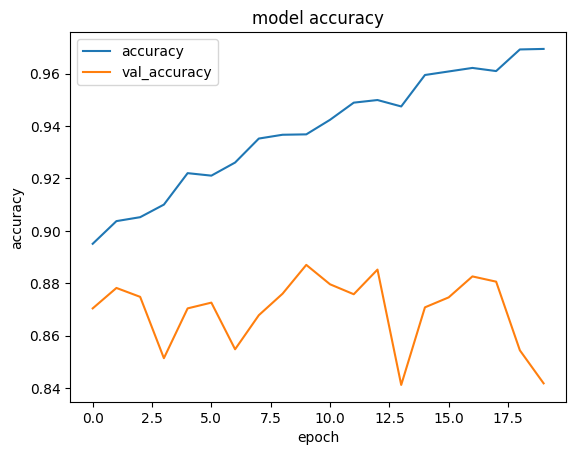

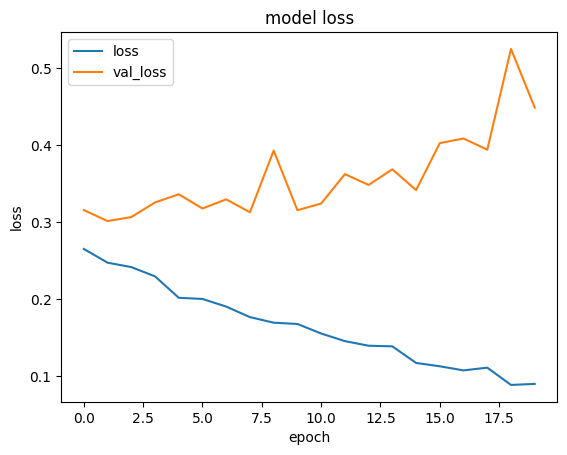

In [10]:
#đọc accuracy và loss
test_acc = test[1] #Độ chính xác của mô hình trên tập kiểm tra
test_loss = test[0] #Mất mát của mô hình trên tập kiểm tra
print("Test accuracy:", test_acc) #In độ chính xác
print("Test loss:", test_loss) #In mất mát
#Vẽ đồ thị
plt.plot(history.history['acc'], label='accuracy') #Vẽ độ chính xác
plt.plot(history.history['val_acc'], label='val_accuracy') #Vẽ độ chính xác trên tập kiểm tra
plt.title('model accuracy') #Tiêu đề đồ thị
plt.xlabel('epoch') #Nhãn trục x
plt.ylabel('accuracy') #Nhãn trục y
plt.legend() #Hiện chú thích
plt.show() #Hiện đồ thị
plt.plot(history.history['loss'], label='loss') #Vẽ mất mát
plt.plot(history.history['val_loss'], label='val_loss') #Vẽ mất mát trên tập kiểm tra
plt.title('model loss') #Tiêu đề đồ thị
plt.xlabel('epoch') #Nhãn trục x
plt.ylabel('loss') #Nhãn trục y
plt.legend() #Hiện chú thích

